In [8]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#dados = pd.read_csv("Banana.csv")
dados = pd.read_csv("Mammo.csv")
#dados = pd.read_csv("Faults.csv",header=None)

dados.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,-0.213927,-0.212827,-0.762205,-1.412731,0.240746,1
1,0.329069,0.781717,1.187349,1.703725,0.240746,1
2,-0.213927,0.246193,-0.762205,-1.412731,0.240746,1
3,-0.213927,-0.824854,-0.762205,-1.412731,0.240746,1
4,-0.213927,-1.130867,-0.762205,-0.633617,0.240746,1


In [9]:
df_dados = pd.DataFrame(dados)
#df_dados.info()
#figura = df_dados.plot.scatter(x='A1',y='A2',c='Class',colormap='rainbow')

In [10]:
from sklearn.model_selection import train_test_split
x_treino,x_temp,y_treino,y_temp=train_test_split(df_dados,dados["Severity"],test_size=0.5,stratify=dados["Severity"])
x_validacao,x_teste,y_validacao,y_teste=train_test_split(x_temp,y_temp,test_size=0.5, stratify = y_temp)
print("Treino")
x_treino.info()
y_treino.info()
print("\nValidação")
x_validacao.info()
y_validacao.info()
print("\nTeste")
x_teste.info()
y_teste.info()

Treino
<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 324 to 451
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI-RADS   415 non-null    float64
 1   Age       415 non-null    float64
 2   Shape     415 non-null    float64
 3   Margin    415 non-null    float64
 4   Density   415 non-null    float64
 5   Severity  415 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 22.7 KB
<class 'pandas.core.series.Series'>
Int64Index: 415 entries, 324 to 451
Series name: Severity
Non-Null Count  Dtype
--------------  -----
415 non-null    int64
dtypes: int64(1)
memory usage: 6.5 KB

Validação
<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 483 to 587
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI-RADS   207 non-null    float64
 1   Age       207 non-null    float64
 2   Shape     207 non-null    float64
 3   Margin   

Plotando a Curva ROC

In [11]:

import matplotlib.pyplot as plt

from sklearn import metrics
def plot_roc_curve(fper, tper,cor,classsificador):
    plt.plot(fper, tper, color=cor, label=classsificador)
    plt.plot([0, 1], [0, 1], color="green", linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title('Curva ROC')
    plt.legend()



Desempenho do KNN
              precision    recall  f1-score   support

           1       0.97      1.00      0.99       107
           2       1.00      0.97      0.98       101

    accuracy                           0.99       208
   macro avg       0.99      0.99      0.99       208
weighted avg       0.99      0.99      0.99       208

AUC KNN:  0.9994910706023873

Desempenho do Naive Bayes
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       107
           2       1.00      1.00      1.00       101

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

AUC NB:  1.0

Desempenho da Árvore de Decisão
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       107
           2       1.00      1.00      1.00       101

    accuracy                           1.00       208
   macr

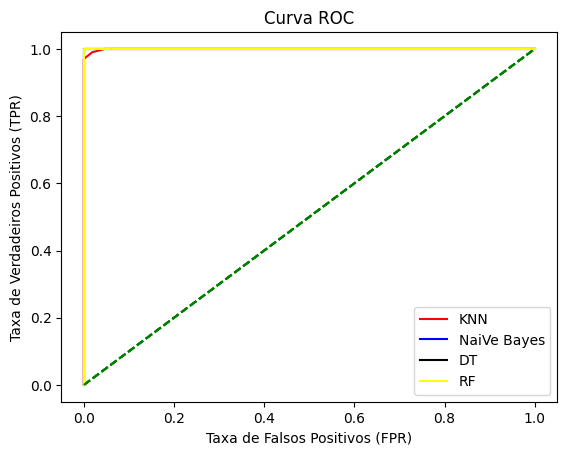

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_treino,y_treino)
opiniao = KNN.predict(x_teste)
print("\nDesempenho do KNN")
print(classification_report(y_teste,opiniao))
y_score = KNN.predict_proba(x_teste)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)
print("AUC KNN: ",metrics.auc(fpr,tpr))
plot_roc_curve(fpr, tpr,"red","KNN")

from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_treino,y_treino)
opiniao = NB.predict(x_teste)
print("\nDesempenho do Naive Bayes")
print(classification_report(y_teste,opiniao))
y_score = NB.predict_proba(x_teste)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)
print("AUC NB: ",metrics.auc(fpr,tpr))
plot_roc_curve(fpr, tpr,"blue","NaiVe Bayes")

from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(x_treino,y_treino)
opiniao = DT.predict(x_teste)
print("\nDesempenho da Árvore de Decisão")
print(classification_report(y_teste,opiniao))
y_score = DT.predict_proba(x_teste)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)
print("AUC DT: ",metrics.auc(fpr,tpr))
plot_roc_curve(fpr, tpr,"black","DT")

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_treino,y_treino)
opiniao = RF.predict(x_teste)
print("\nDesempenho do Random Forest")
print(classification_report(y_teste,opiniao))
y_score = RF.predict_proba(x_teste)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)
print("AUC RF: ",metrics.auc(fpr,tpr))
plot_roc_curve(fpr, tpr,"yellow","RF")